# Machine Learning Interpretability with Shapley values

Shapley values give the contribution of each feature in an example of interest to the model prediction.

Other recources:

I thoroughly recommend this YouTube video from 'Machine Learning Dojo with Tim Scarfe':
https://youtu.be/jhopjN08lTM

Christopher Molner has an excellent online book with details on Shapley values:
https://christophm.github.io/interpretable-ml-book/shapley.html

There is also a good interview with Chris Molner on YouTube in machine Learning Street Talk: https://youtu.be/0LIACHcxpHU

Documentation for the SHAP library: https://shap.readthedocs.io/en/latest/index.html

Talk on the SHAP library by Scott Lunberg, a key author of the SHAP library: https://youtu.be/B-c8tIgchu0

## Shapley Values - Intuition

### Shapley values in game theory

The origin of Shapley values is in game theory, and is used to provide a fair determination of the value each player makes in a coalition [1].

Imagine we have three players who play together in a coalition in a pub quiz. Together they win £100 on average. How should their winnings be split to fairly compensate each person for contribution to the collective winnings?

Shapley values is one way to get at this, and goes like this. Imagine the coalition being formed one quiz player at a time, and the value of the player is the difference in winnings by adding in that one player.

So player A alone may win £75, and so in this case adds a value of £75. Player A+B together win £90 and so player B has added £15 of value vs. player A alone. Players ABC together win £100, so player C has added £10 of value on top of player A.

But - some questions are easier and all may know the answer. If we only have one order of addition then the first player (who plays alone) will seem to have the hightest value. Player B can only add value to those questions that player A does not know the answer to, and player C can only add value to those questions that players A and B together do not know the answer to.

So a full Shapley analysis has all permutations, allowing all players to be first, and second to other players, and third. The table below shows all the permutations. Those in italics have been performed before and would not need repeating (player combination A+B is the same as player combination B+A).

Permutation| Sequence to test
---|---
ABC | A, AB, ABC
ACB | *A*, AC, *ACB*
BAC | B, *BA*, *BAC*
BCA | *B*, BC, *BCA*
CAB | C, CA, *CAB*
CBA | *C*, *BA*, *CBA*

For each combination tested (including single players) we calulcate the value they added in the step-wise addition of players. We then average the added value each player makes in different combinations. That average gives us the average marginal contribution each player makes. The sum of these average marginal contribution will add up to average winnings of the whole team playing together.

### Shapley values in machine learning

So what is the link to machine learning?

Shapley values provide a measure of contribution made by different features to a prediction.

Imagine I have three features for prediction of house price: size, number of bedrooms, area crime rate. I am interested in knowing, using any type of machine learning model, the contribution each feature made to a prediction.

In Shapley values in machine learning the total contribution features make to a prediction is the difference in prediction for that particular instance compared with the mean value for the whole population. In the case of house prices, if I am given no feature information then all my predictions will just be the average price. As I add in features (in different combinations) I get closer to the prediction using all information (features).

Here we are likely to have covariance between features - that is they are linked. The size of a property is likely to have some relationship with the number of rooms. And perhaps larger houses are also built in lower crime areas. So again the first feature added will probably grab much of the total prediction value, just like the first pub quiz player grabbed much of the total winnings. So, as with my pub quiz team I can run all combinations of adding features, fitting the model to each combination and calculating the value added (difference between that prediction and just the average house price) by different features. I then average the value added for each feature across all permutations tested.

### Four key properties of Shapley properties

Shapley values obey four key properties of explainability:

* *Efficiency*: The feature contributions add up to the difference in the prediction for x from the average.

* *Symmetry*: The contributions of two features values are the same if they contribute equaly to all possible combinations of features used. This is also called *equal treatment of equals*

* *Additivity* or *Linearity*: The prediction in any case should be proportional to the Shapley values for that case. Suppose you trained a random forest, which means that the prediction is an average of many decision trees. The Additivity property guarantees that for a feature value, you can calculate the Shapley value for each tree individually, average them, and get the Shapley value for the feature value for the random forest.

* *Nullity* or *Dummy*: If a feature does not improve preidction then the Shapley value for that feature should be zero.If a feature does not improve preidction then the Shapley value for that feature should be zero.

## Shapley values in practice

The above gives the intuition behind Shapley values, but it is rare that we can do this in practice. As the number fo features grow, the number of permutations explode - giving us an unfeasible number of models to fit and test.

So, two methods can be used (and these days, the second method, the SHAP library, is almost universally used).

### Shapley sampling

In Shapley sampling we use a couple of tricks to make the problem more computationally acceptable:

1) We do not refit models excluding features, but rather we approximate the model fit without a feature, by replacing that feature value either with the mean or median value of that feature across all values, or by replacing that feature value with a random sample from the population (and we are likely to repeat this to get a number of estimates).

2) We sample from possible permutaions and take the mean. As the number of samples increases the mean sampled Shapely estimate will tend towards the true Shapley value.

Strumbelj et al. [2] provided the following method, which tests the value of adding feature *j* in combination with any other feature values:

To estimate for Shapley values for any instance of interest, *x*:

Repeat for each feature, *j*:

  * Repeat the following for *m* iterations:
  
    * Draw a random instance, *z* from the population

    * Choose a random order of feature values

    * Create two hybrid instances. Both are identical up to, and after, feature *j*, but one instance takes the value of *j* from our instance of interest *x*, and the other from our random sample, *z*:
      
      1. Use values from *x* for all feature values up to *and including* feature *j*, and then use values from *z* for the remaining feature values.
      2. Use values from *x* for all feature values up to *but not including* feature *j*, and then use values from *z* for the remaining feature values, including feature *j*.
     
     * Compute the marginal contribution of feature *j* by taking model estimates of hybrid instances with and without *j* from *x*: *f(x+j)* - *f(x-j*)
      
      * Computer the Shapley value for *j* in instance *x* as the average of the m* iterations

### SHAP 

SHAP is a python Library with efficient algorithms for estimatign Shapley values. For more details see:

https://shap.readthedocs.io/en/latest/

https://github.com/slundberg/shap

Lundberg, A. and Lee, S-I (2017) A Unified Approach to Interpreting Model Predictions. arXiv:1705.07874 https://arxiv.org/abs/1705.07874


Here, we will use the SHAP library,

### References

[1]  Shapley, Lloyd S. (August 21, 1951). "Notes on the n-Person Game -- II: The Value of an n-Person Game" (PDF). Santa Monica, Calif.: RAND Corporation. https://www.rand.org/content/dam/rand/pubs/research_memoranda/2008/RM670.pdf

[2] Štrumbelj, Erik, and Igor Kononenko. "Explaining prediction models and individual predictions with feature contributions." Knowledge and information systems 41.3 (2014): 647-665

## Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Install shap if necessary (e.g. running in Google Colab)
try:
    import shap
except:
    !pip install shap
    import shap

## Regression Analysis: Boston House Price Predictions

The Boston House Price data set provides various features descsribing a house, and its value. It is commonly used to demonstrate multiple regression.

The data is available in `shap.datasets`.

In [3]:
X, y = shap.datasets.boston()

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Show value to bepredicted (y, house price)
y[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

### Split training and test

We use SciKit's Learn's method for spliting data into training (80%) and test (20%).

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### Fit Linear Regression Model

We use SciKit Learn's linear regression model.

In [7]:
# Create a Linear regressor
model = LinearRegression()

# Train the model using the training sets 
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Model prediction on train data
y_pred = model.predict(X_train)

### Make predictions and test accuracy

In [9]:
# Model prediction on train data
y_pred = model.predict(X_test)

In [10]:
# Model Evaluation
print(f'R^2: {metrics.r2_score(y_test, y_pred):0.3f}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred):0.1f}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred):0.1f}')
print(f'RMSE:{np.sqrt(metrics.mean_squared_error(y_test, y_pred)):0.1f}')

R^2: 0.669
MAE: 3.2
MSE: 24.3
RMSE:4.9


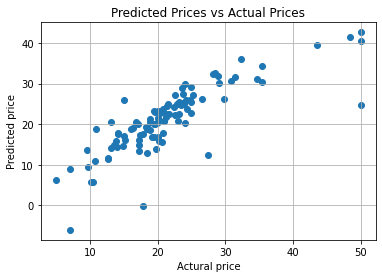

In [11]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actural price")
plt.ylabel("Predicted price")
plt.title("Predicted Prices vs Actual Prices")
plt.grid()
plt.show()

## Getting Shapley values with SHAP

We use the `explainer` and `shap_values` methods from the SHAP library to get Shapley values.

A slight confusion is that we can get Shapley values alone, or with other variables.

### Global influence of features in the training set

Here we are lookign at Shapley values for the training set, to understand the influence of features in training.

In [12]:
# Train explainer on Training set
explainer = shap.Explainer(model, X_train)

Show non-hidden attributes and methods in the explainer

In [13]:
[z for z in dir(explainer) if z[0:2] != '__']

['M',
 '_compute_main_effects',
 '_estimate_transforms',
 '_instantiated_load',
 '_parse_model',
 'coef',
 'expected_value',
 'explain_row',
 'feature_names',
 'feature_perturbation',
 'intercept',
 'link',
 'load',
 'masker',
 'mean',
 'model',
 'nsamples',
 'output_names',
 'save',
 'shap_values',
 'supports_model_with_masker']

### Get Shapley values alone

In [14]:
# Get Shapley values alone
shap_values = explainer.shap_values(X_train)

In [15]:
# Shap values are a list of shap values for each instance
# Note: In some other explainers, this will be different
len(shap_values)

404

If we look at the first element of the list we see the Shapley values for the first instance in the training set.

In [16]:
shap_values[0]

array([-1.26547852, -0.2980936 ,  0.28583089, -0.25059944, -1.01409524,
       -4.28764847, -0.17002697,  2.44188431,  3.72650225, -2.71141706,
       -1.59380931, -0.19104056, -6.32317023])

### Get Shapley values with other information

We can use the `explainer(X)` method to get objects with shap values, base value*, and feature data.

*The base value is “the value that would be predicted if we did not know any features for the current output.” In other words, it is the mean prediction, or mean(yhat).

In [17]:
shap_values = explainer(X_train)
shap_values[0]

.values =
array([-1.26547852, -0.2980936 ,  0.28583089, -0.25059944, -1.01409524,
       -4.28764847, -0.17002697,  2.44188431,  3.72650225, -2.71141706,
       -1.59380931, -0.19104056, -6.32317023])

.base_values =
22.62068601187983

.data =
array([1.50234e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01,
       5.30400e+00, 9.73000e+01, 2.10070e+00, 2.40000e+01, 6.66000e+02,
       2.02000e+01, 3.49480e+02, 2.49100e+01])

## Summary plots

Summary plots may be used to visualse the influence of features in the model.

The `shap.summary_plot` shows the global influence of features - that is the average absolute SHAP value of features across the data set.

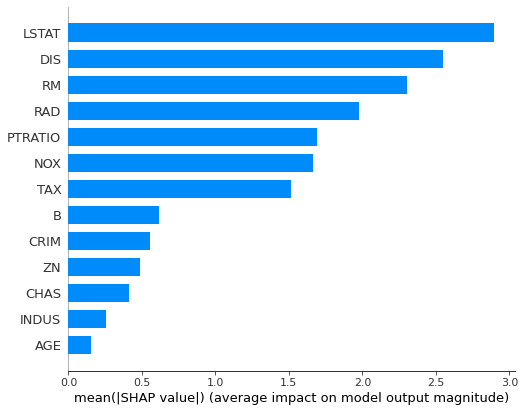

In [18]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

Individual instances may also be plotted - the colour shows the effect on the prediction (normlaised to that features own influence).

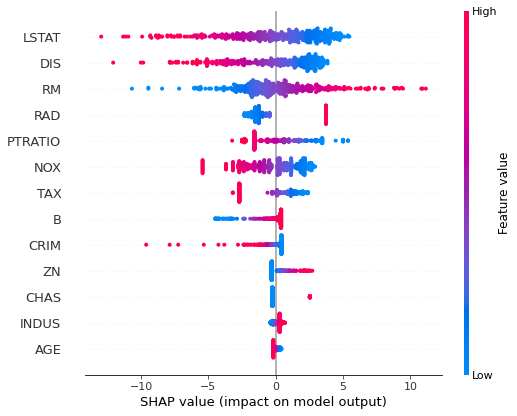

In [19]:
shap.summary_plot(shap_values, X_train)
# This is also the same as shap.plots.beeswarm(shap_values)

## Influence of features in individual examples in the test set

Here we will look at individial instance predictions, and how the different features contributed to prediction for that instance.

In [20]:
# Train explainer on Training set
explainer = shap.Explainer(model, X_test)
# Get Shapley values
shap_values = explainer(X_test)

Show a `waterfall` plot for the first instance in the test set. The `waterfall` plot starts with the average house price, *E[f(X)]*, at the bottom, and shows the influence of each feature, ending with the most influential feature at the top along with the predicted house price, *f(x)*.

Shap values are coloured: red bars show features that increase the predicted price compared with the average house price, and blue bars show features that reduce the predicted price compared with the average house price.

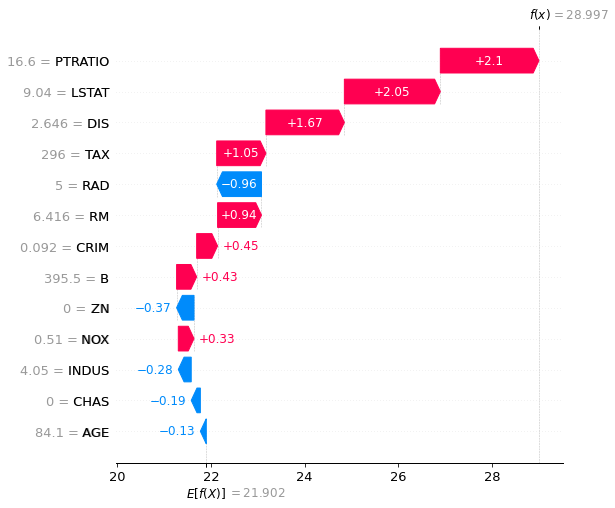

In [21]:
shap.plots.waterfall(shap_values[0], max_display=15)

The `force` plot is an alternative to the `waterfall` plot, showing the influence of each feature in a single instance. 

This plot uses javascript, and so `shap.initjs` is needed to be tun once in the notebook. Unlike other plots this plot is not displayed when a notebook is re-opened.

In [22]:
shap.initjs()
shap.force_plot(shap_values[0])